# Plotly&Bokeh
----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# Quiz 1
นาย A,B,C,D,E มีรายได้ 10,000 20,000 30,000 40,000 60,000 ต่อเดือนในปี 2020 ตามลำดับ ทุกๆปีเงินเดือนจะเพิ่ม 7% จงสร้าง DataFrame เก็บเงินเดือนของทั้ง 5 นาย ในปี 2016,2017,2018,2019,2020 

In [2]:
name = ['A', 'B' , 'C' , 'D' , 'E']*5
year = ['2020']*5 + ['2019']*5 + ['2018']*5 + ['2017']*5 + ['2016']*5
salary = []
for i in range(5):
    x = np.array([10000,20000,30000,40000,60000])
    x = x/(1.07**i)
    salary = salary + list(x.round(2))
    
datas = list(zip(name,year,salary))
cols = ['Name' , 'Year' , 'Salary']
df = pd.DataFrame(datas,columns=cols)
df

,Name,Year,Salary
0,A,2020,10000.00
1,B,2020,20000.00
2,C,2020,30000.00
3,D,2020,40000.00
4,E,2020,60000.00
5,A,2019,9345.79
6,B,2019,18691.59
7,C,2019,28037.38
8,D,2019,37383.18
9,E,2019,56074.77


---
# Quiz 2
ใช้ข้อมูลจากข้อ 1 สร้าง Bar Plot ให้แกน X เป็นชื่อ และแกน Y เป็นเงินของปี 2017 คูณ 2 และสลับแกน (สองกราฟ) และปรับให้แกน X เอียง -45 องศา

In [126]:
new_salary = df[df['Year'] == '2017']['Salary']*2
new_salary

15    16325.96
16    32651.92
17    48977.88
18    65303.84
19    97955.74
Name: Salary, dtype: float64

In [104]:
df['Name'][15:20]

15    A
16    B
17    C
18    D
19    E
Name: Name, dtype: object

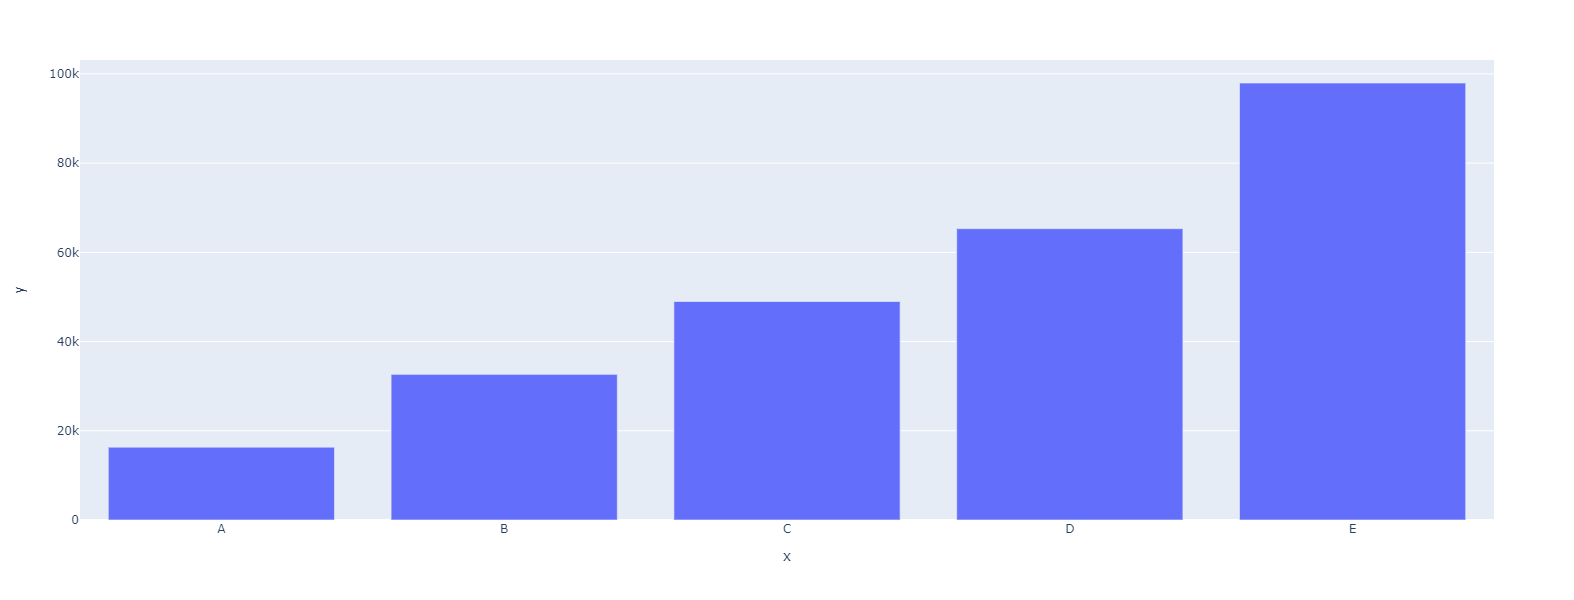

In [127]:
fig = px.bar(x=df['Name'][15:20] , y=new_salary, height=600)
fig.show()

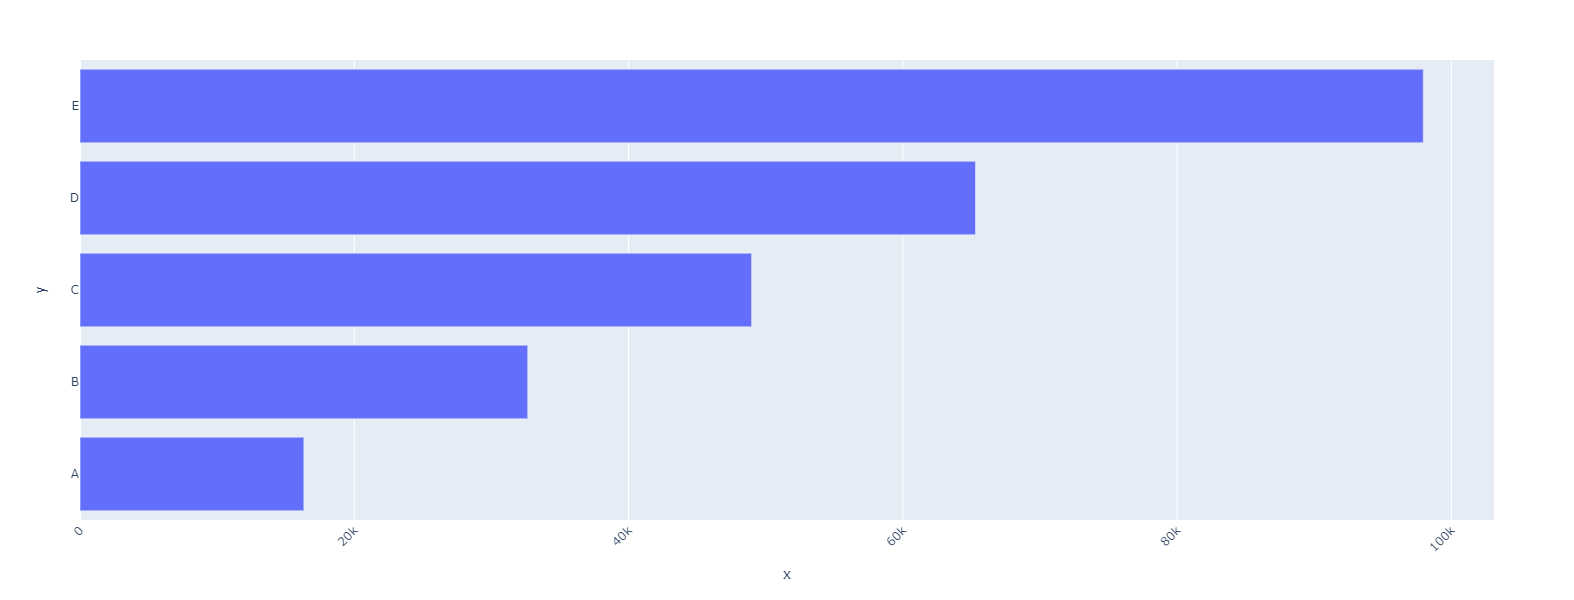

In [128]:
fig = px.bar(y=df['Name'][15:20] , x=new_salary, height=600)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Quiz 3
จากข้อ 2 ให้ตั้งชื่อกราฟให้เหมาะสม เป็นชื่อแกน X Y ให้เหมาะสมและให้ไล่สีจากเงินเดือนปี 2016 รวมถึงเมื่อนำเม้าส์ไปวาง จะแสดงเงินเดือนเงินเดือนของแต่ละปี และเงินเดือนเฉลี่ย (จะเพิ่ม column ใน DataFrame หรือจะคำนวณแยกก็ได้) 

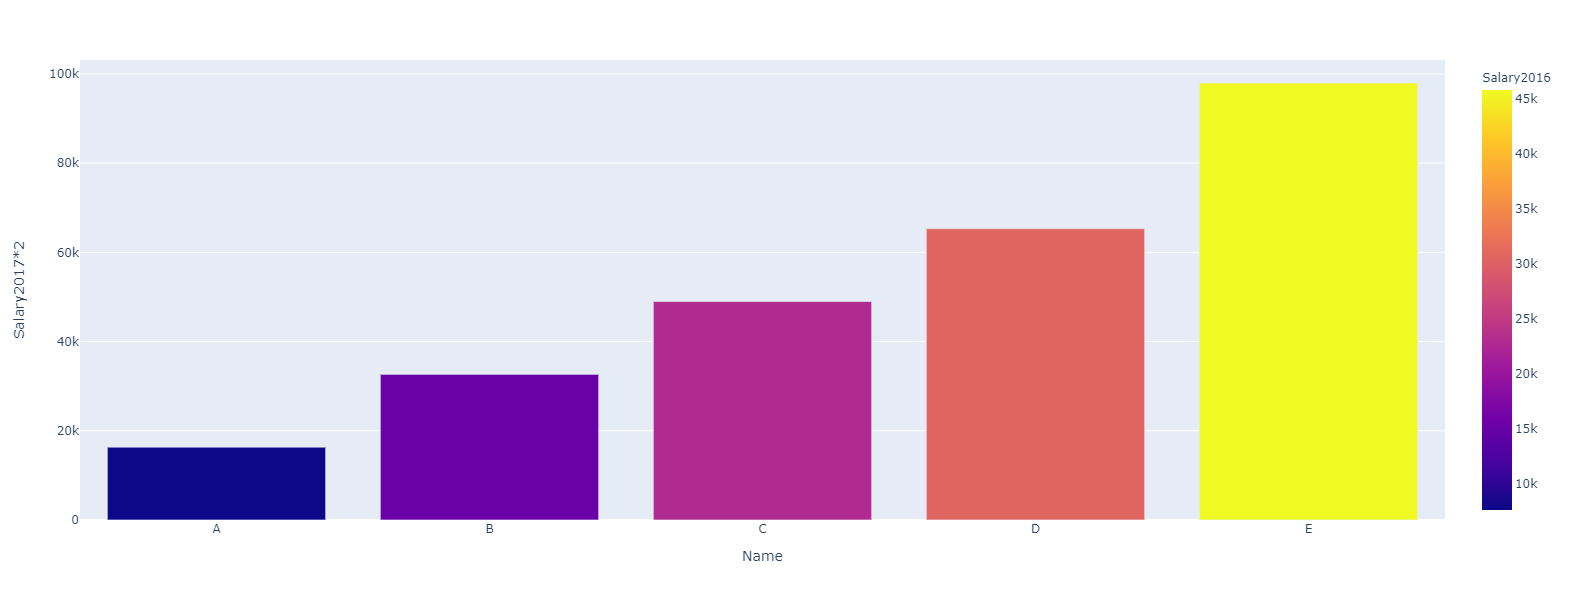

In [122]:
fig = px.bar(x=df['Name'][15:20] , y=x*2, height=600 , color= df[df['Year'] == '2016']['Salary'] , 
             labels={'x':'Name' , 
                     'y':'Salary2017*2' , 
                     'color':'Salary2016' ,
                    'hover_data_0':'Salary2018',
                    'hover_data_1':'Salary2019' ,
                    'hover_data_2':'Salary2020' ,
                    'hover_data_3':'SalaryMean'} , 
             hover_data=[df[df['Year'] == '2018']['Salary'] , 
                         df[df['Year'] == '2019']['Salary'] ,
                         df[df['Year'] == '2020']['Salary'] , 
                         df.groupby('Name').mean()['Salary'].round(2)])
fig.show()

## ให้ Import ไฟล์ Titanic จากบทเรียน Pandas เข้าสู่ Jupyter Notebook

In [3]:
df = pd.read_csv('https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Quiz 4
สร้าง Line Graph โดยให้แกน Y เป็นราคาเฉลี่ยของค่าโดยสารของแต่ละอายุ และแกน X เป็นอายุ พร้อมทั้งแก้ชื่อแกน ตั้งชื่อกราฟให้เหมาะสม

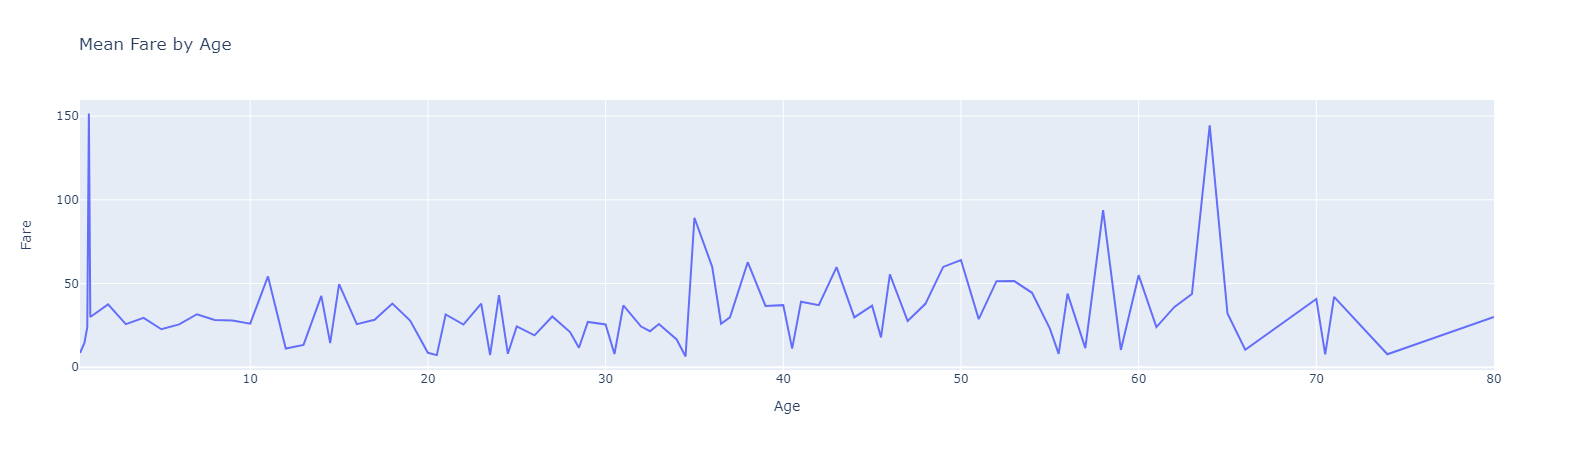

In [13]:
df_quiz4 = df[['Age' , 'Fare']].groupby('Age').mean()

px.line(x=df_quiz4.index , y = df_quiz4['Fare'],title='Mean Fare by Age' , labels = {'x' : 'Age' , 'y' : 'Fare'} )

# Quiz 5
สร้าง Line Graph โดยให้แกน Y เป็นราคาเฉลี่ยของค่าโดยสารของแต่ละชั้นโดยสาร และแกน X เป็นชั้นโดยสาร พร้อมทั้งแก้ชื่อแกน ตั้งชื่อกราฟให้เหมาะสม

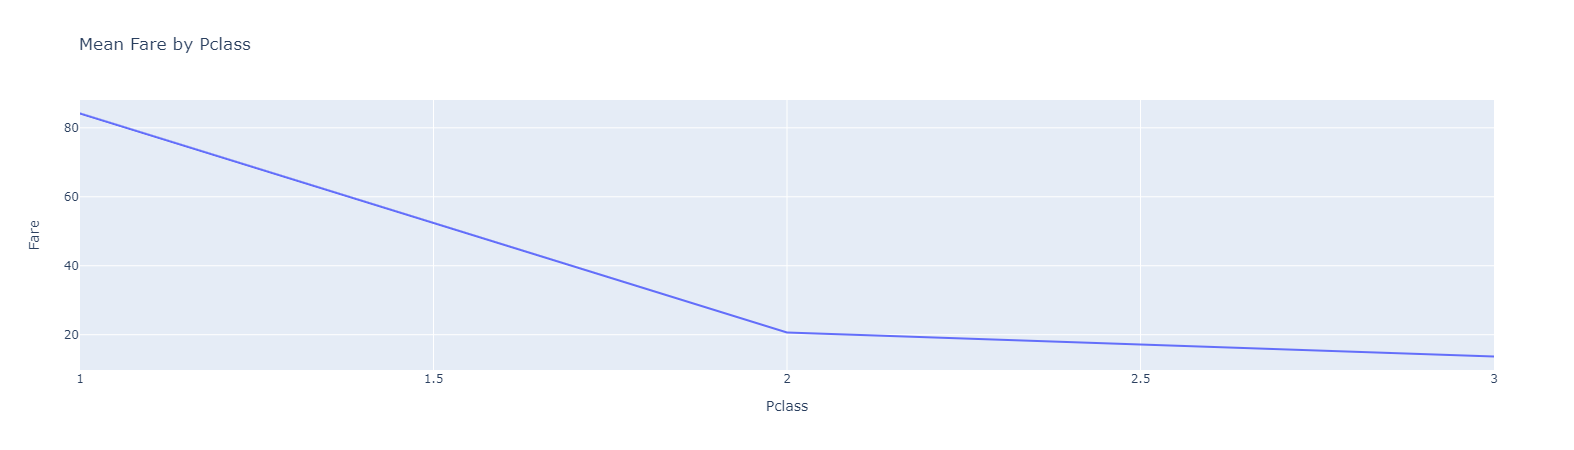

In [18]:
df_quiz5 = df[['Pclass' , 'Fare']].groupby('Pclass').mean()

px.line(x=df_quiz5.index , y = df_quiz5['Fare'],title='Mean Fare by Pclass' , labels = {'x' : 'Pclass' , 'y' : 'Fare'} )

# Quiz 6
สร้าง Pie Chart หา Sum ของราคาค่าโดยสารแต่ละอายุ

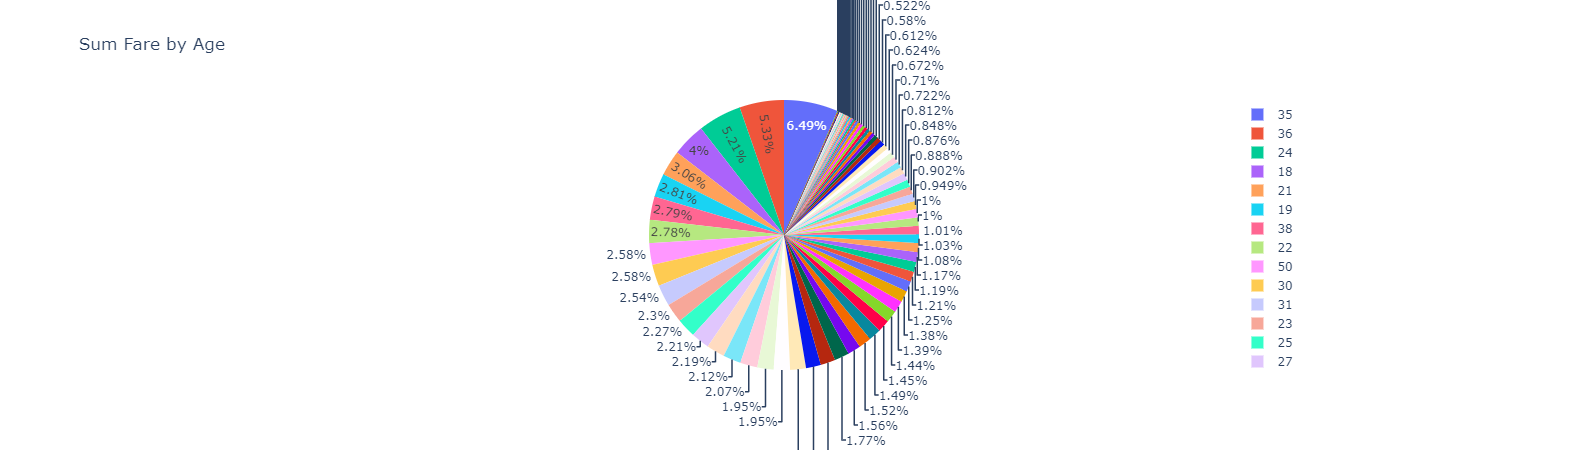

In [19]:
df_quiz6 = df[['Age' , 'Fare']].groupby('Age').sum()

px.pie(df_quiz6 , values = df_quiz6['Fare'] , names = df_quiz6.index , title='Sum Fare by Age' )

# Quiz 7
สร้าง Pie Chart หา Mean ของราคาค่าโดยสารแต่ละอายุ

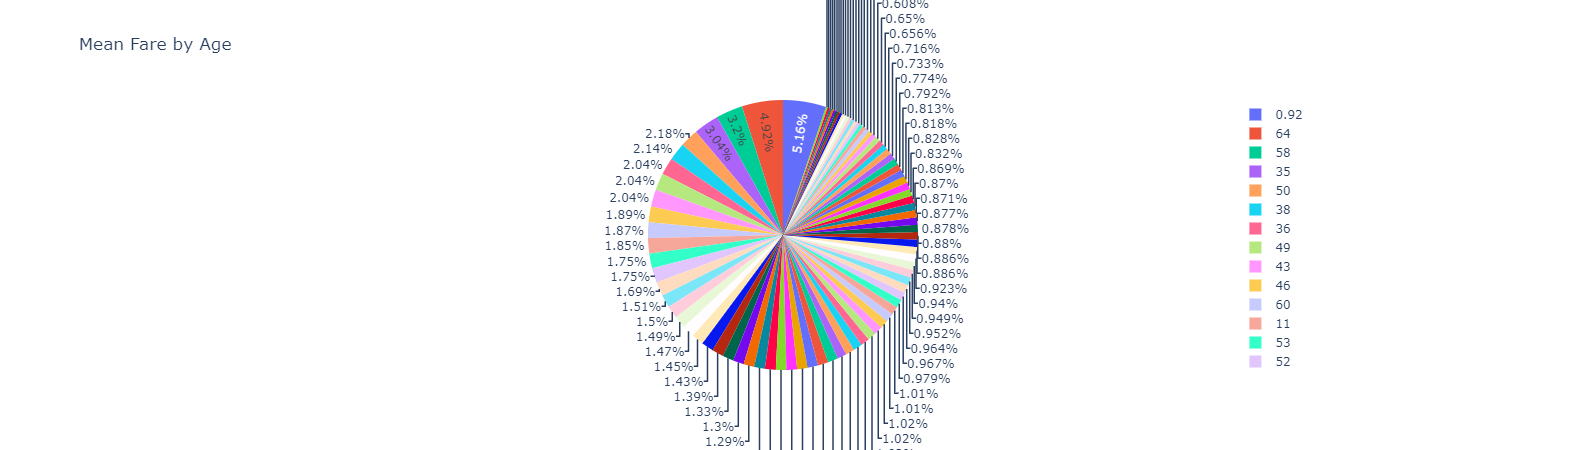

In [23]:
px.pie(data_frame=df_quiz4 , names = df_quiz4.index , values='Fare' , title = 'Mean Fare by Age' )

# Quiz 8
ร้าง Pie Chart หา Mean ของราคาของคนที่มีมีนามสกุลซ้ำกัน (จากแบบฝึกหัด Pandas)

In [99]:
x = df['Surname'].value_counts()
x = x[x > 1]
x =list(x.index)

['Andersson',
 'Sage',
 'Goodwin',
 'Panula',
 'Carter',
 'Skoog',
 'Johnson',
 'Rice',
 'Brown',
 'Williams',
 'Smith',
 'Ford',
 'Harris',
 'Baclini',
 'Palsson',
 'Gustafsson',
 'Hart',
 'Lefebre',
 'Harper',
 'Asplund',
 'Fortune',
 'Kelly',
 'Allison',
 'Boulos',
 'Richards',
 'Flynn',
 'Newell',
 'Graham',
 'Hansen',
 'West',
 'Johansson',
 'Elias',
 'Meyer',
 'Hoyt',
 'Olsen',
 'Hickman',
 'Vander Planke',
 'Taussig',
 'Laroche',
 'Jussila',
 'Collyer',
 'Van Impe',
 'Davies',
 'Thayer',
 'Moran',
 'Navratil',
 "O'Brien",
 'Goldsmith',
 'Jensen',
 'Bourke',
 'Futrelle',
 'Andrews',
 'Sandstrom',
 'Beane',
 'Renouf',
 'Silvey',
 'Murphy',
 'Hamalainen',
 'Cacic',
 'Daly',
 'Baxter',
 'Taylor',
 'Svensson',
 'Hippach',
 'Webber',
 'Keane',
 'Kantor',
 'Dick',
 'Petroff',
 'Arnold-Franchi',
 'Pears',
 'Abelson',
 'Nicola-Yarred',
 'Rosblom',
 'Hakkarainen',
 'McCoy',
 'Coutts',
 'Jacobsohn',
 'Danbom',
 'Abbott',
 'Zabour',
 'Quick',
 'Strom',
 'Hagland',
 'Duff Gordon',
 'Becker',

In [126]:
df.set_index('Surname' , inplace = True)

df_new = df.loc[x]

In [127]:
df_new.reset_index(inplace=True)
df_quiz8 = df_new[['Surname' , 'Fare']].groupby('Surname').mean()
df_quiz8

,Fare
Surname,
Abbott,20.25000
Abelson,24.00000
Ali,7.05000
Allen,109.69375
Allison,151.55000
...,...
White,77.28750
Wick,164.86670
Williams,24.63230


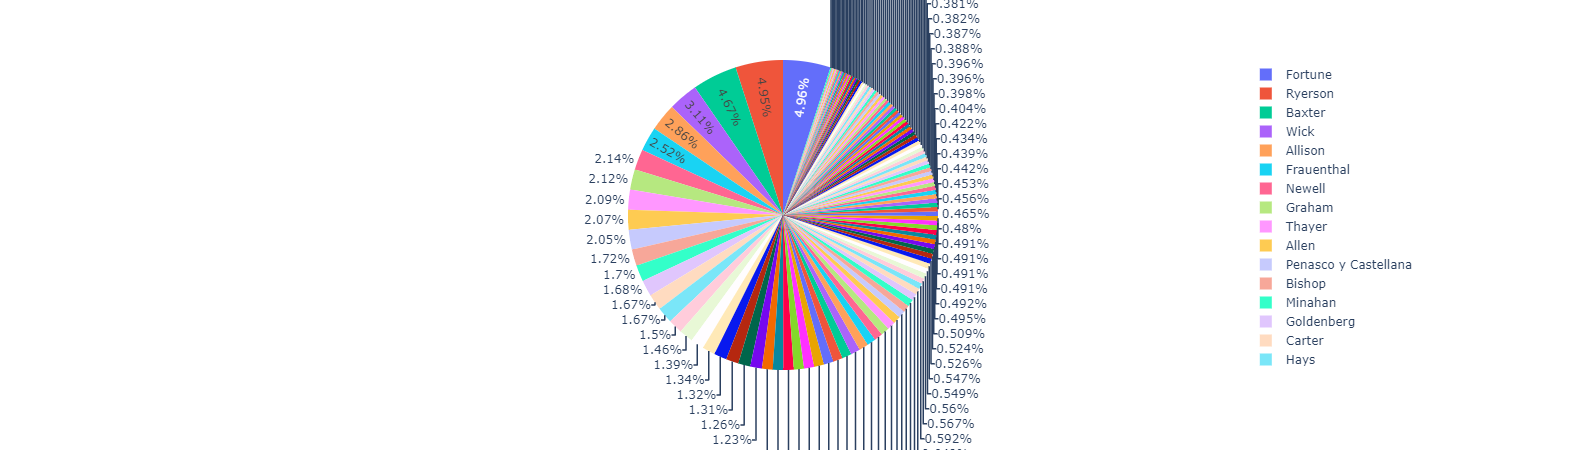

In [129]:
px.pie(df_quiz8 , df_quiz8.index , df_quiz8['Fare'])

# Quiz 9 
สร้าง Pie Chart หา Mean ของอายุของคนที่มีมีนามสกุลซ้ำกัน (จากแบบฝึกหัด Pandas) พร้อมทั้งตั้งชื่อและเปลี่ยนสี

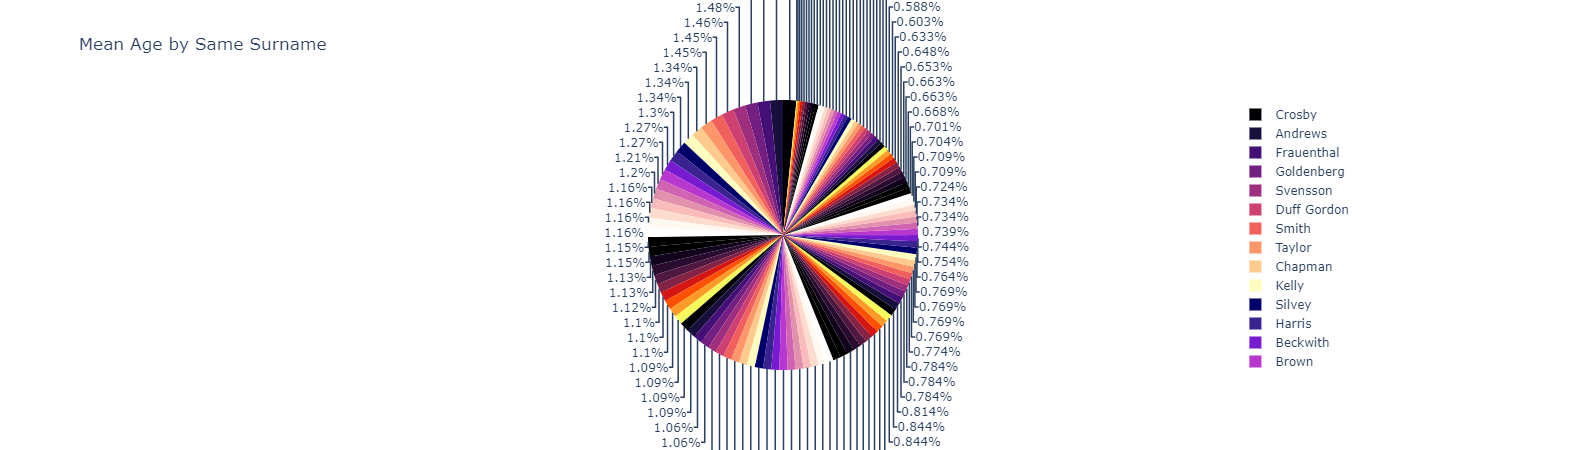

In [131]:
df_quiz9 = df_new[['Surname' , 'Age']].groupby('Surname').mean()

px.pie(df_quiz9 , df_quiz9.index , df_quiz9['Age'] , title='Mean Age by Same Surname' , color_discrete_sequence=px.colors.sequential.Magma)

# Quiz 10
สร้าง Pie Chart หา Mean ของแต่ละจุดหมายปลายทาง (Embarked) พร้อมทั้งตั้งชื่อและเปลี่ยนสี

In [133]:
df.reset_index(inplace=True)

In [138]:
df_quiz10 = df[['Embarked', 'Fare']].groupby('Embarked').mean()
df_quiz10

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


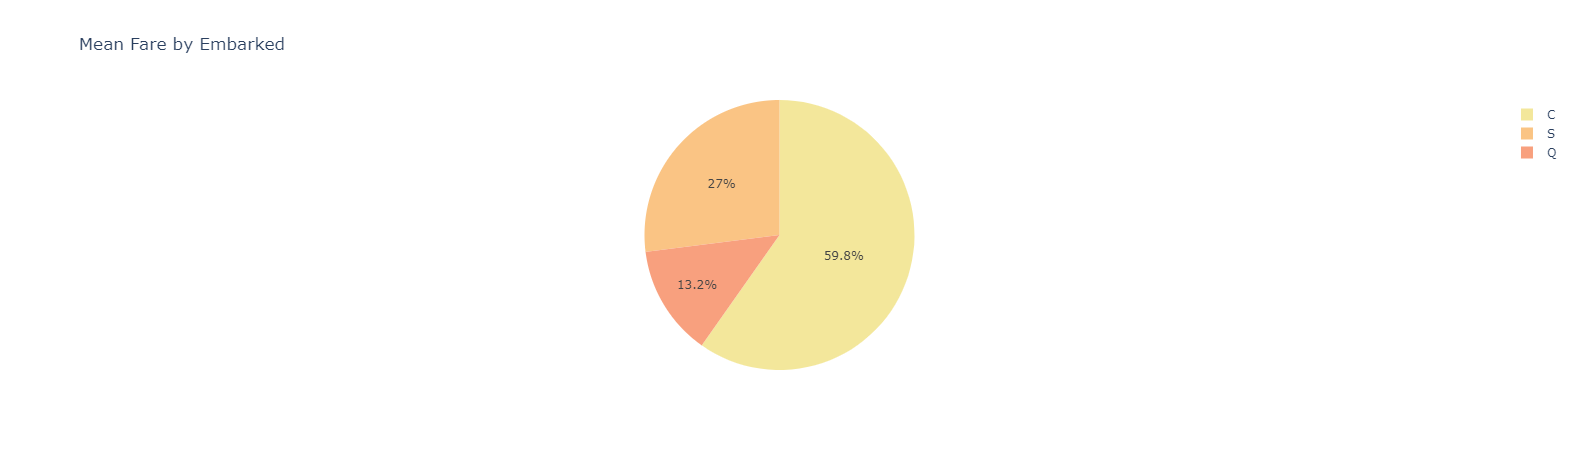

In [147]:
px.pie(df_quiz10 , df_quiz10.index , 'Fare' , title='Mean Fare by Embarked' , color_discrete_sequence=px.colors.sequential.Sunset)

# Quiz 11
สร้าง Bubble Chart ให้แกน X เป็นช่วงอายุ แกน Y เป็นราคาเฉลี่ย ขนาดตามจำนวนเฉลี่ยของพี่น้องและคู่สมรส (เช็คคอลัมน์) ในช่วงอายุนั้น พร้อมทั้งตั้งชื่อแกน X Y และชื่อกราฟ และไล่สีตามค่าเฉลี่ยของ Pclass

In [151]:
def tran_age(x):
    if x <= 10 :
        return '0-10 year'
    elif x <=20 :
        return '11-20 year'
    elif x <=30 :
        return '21-30 year'
    elif x <= 40 :
        return '31-40 year'
    elif x <= 50 :
        return '41-50 year'
    elif x <= 60 :
        return '51-60 year'
    elif x <= 70 :
        return '61-70 year'
    elif x <= 80 :
        return '71-80 year'

In [205]:
df['Range_age'] = df['Age'].apply(tran_age)
df.dropna(subset=['Age'] ,inplace=True)
df['Pclass'] = df['Pclass'].astype(int)
df

,Surname,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Range_age
0,Braund,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30 year
1,Cumings,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40 year
2,Heikkinen,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30 year
3,Futrelle,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40 year
4,Allen,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Rice,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,31-40 year
886,Montvila,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21-30 year
887,Graham,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11-20 year
889,Behr,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21-30 year


In [206]:
df_quiz11 = df[['Range_age' , 'Fare' , 'SibSp' , 'Pclass']].groupby('Range_age').mean()
df_quiz11

,Fare,SibSp,Pclass
Range_age,,,
0-10 year,30.434439,1.843750,2.640625
11-20 year,29.529531,0.591304,2.530435
21-30 year,28.306719,0.321739,2.386957
31-40 year,42.496100,0.374194,2.090323
41-50 year,41.163181,0.372093,1.918605
51-60 year,44.774802,0.309524,1.523810
61-70 year,45.910782,0.176471,1.529412
71-80 year,25.936680,0.000000,1.800000


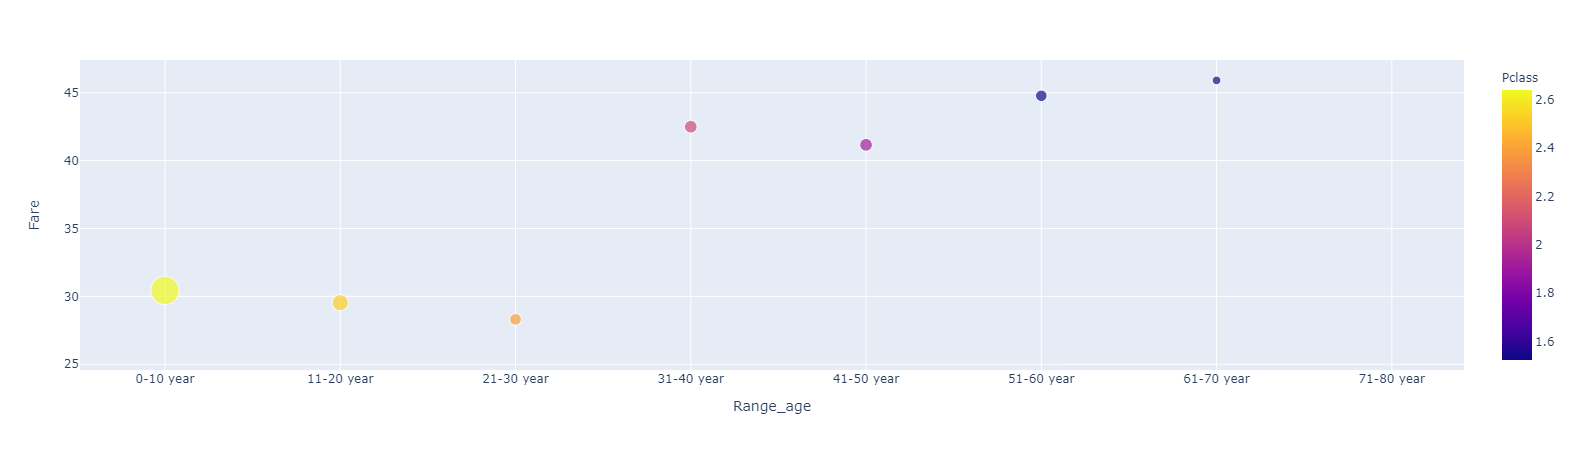

In [207]:
px.scatter(df_quiz11 , x=df_quiz11.index , y='Fare' , size = 'SibSp' , color='Pclass')

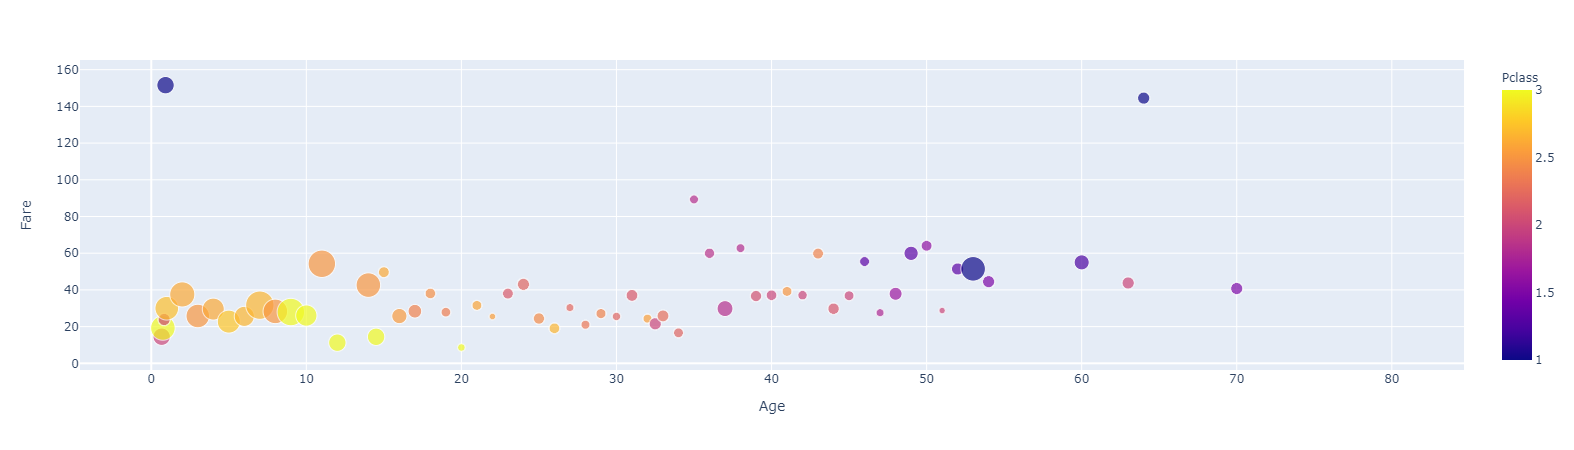

In [217]:
# คำตอบข้อ 11 แบบที่ 2 เผื่อผมอาจเข้าใจโจทย์คำว่าช่วงอายุผิดไปครับ
df_new11 = df[['Age' , 'Fare' , 'SibSp' , 'Pclass']].groupby('Age').mean()
px.scatter(df_new11 , x=df_new11.index , y='Fare' , size='SibSp' , color='Pclass')

# Quiz 12
สร้าง Box Plot ให้แกน X เป็นเพศ และ แกน Y เป็นราคา

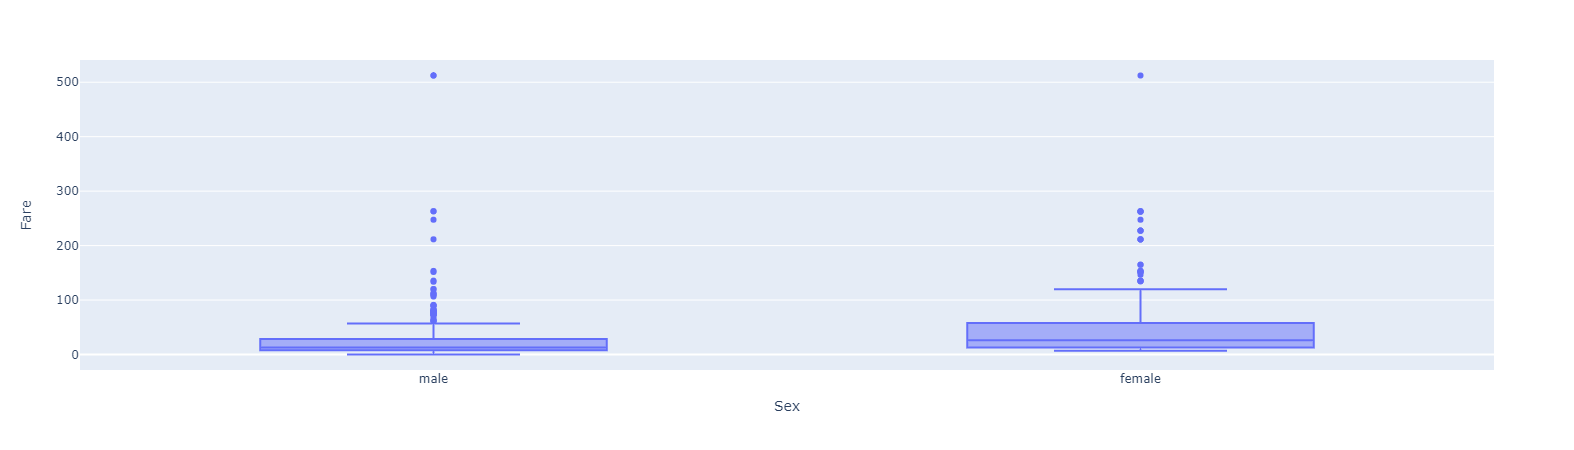

In [188]:
px.box(df , x='Sex' , y= 'Fare' )

# Quiz 13
สร้าง Box Plot ให้แกน X เป็นPclass และ แกน Y เป็นราคา

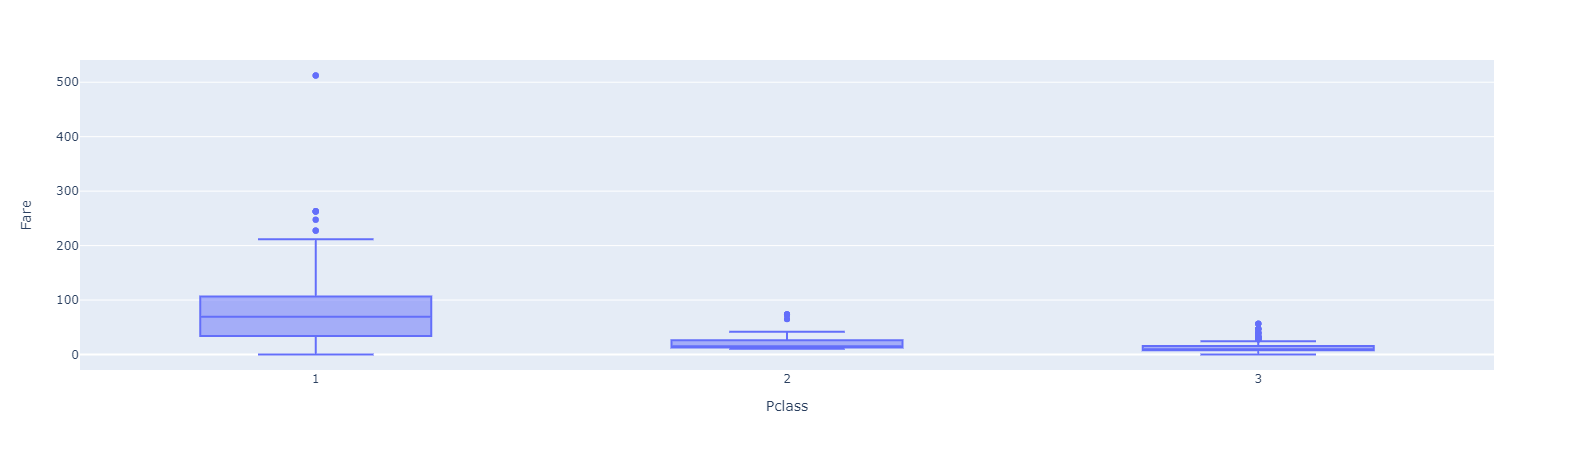

In [189]:
px.box(df , x='Pclass' , y='Fare')

# Quiz 14
สร้าง Box Plot ให้แกน X เป็นPclass และ แกน Y เป็นอายุ ให้ Points = all

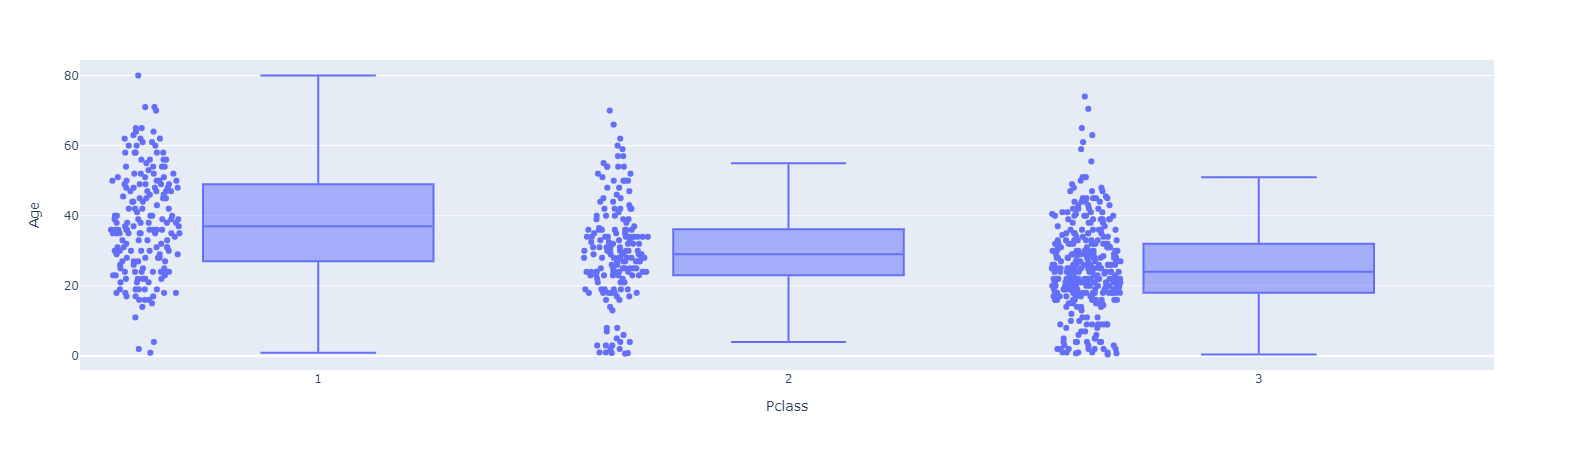

In [200]:
fig = px.box(df , 'Pclass' , 'Age' , points='all')
fig.show()

# Quiz 15
สร้าง Box Plot ให้แกน X เป็น Survived แกน Y เป็นอายุ และสีเป็นเพศ 

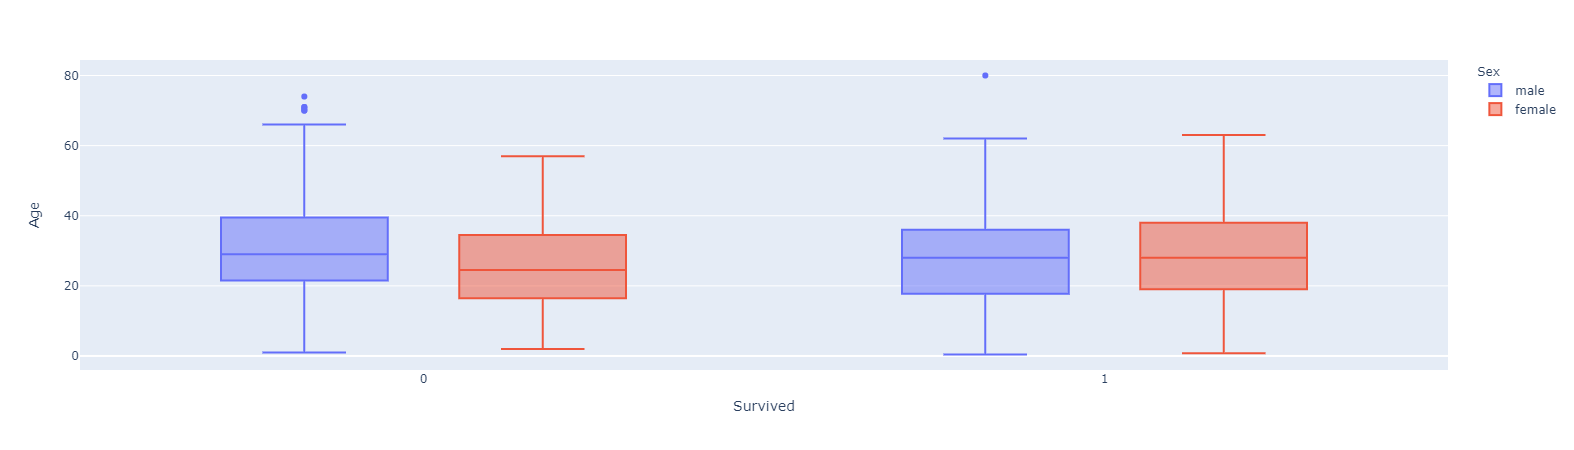

In [208]:
px.box(df , 'Survived' , 'Age' , color = 'Sex')

# Quiz 16
สร้าง barplot โดยให้ แกน X เป็นจุดหมายปลายทางและแกน Y เป็น std ของราคา

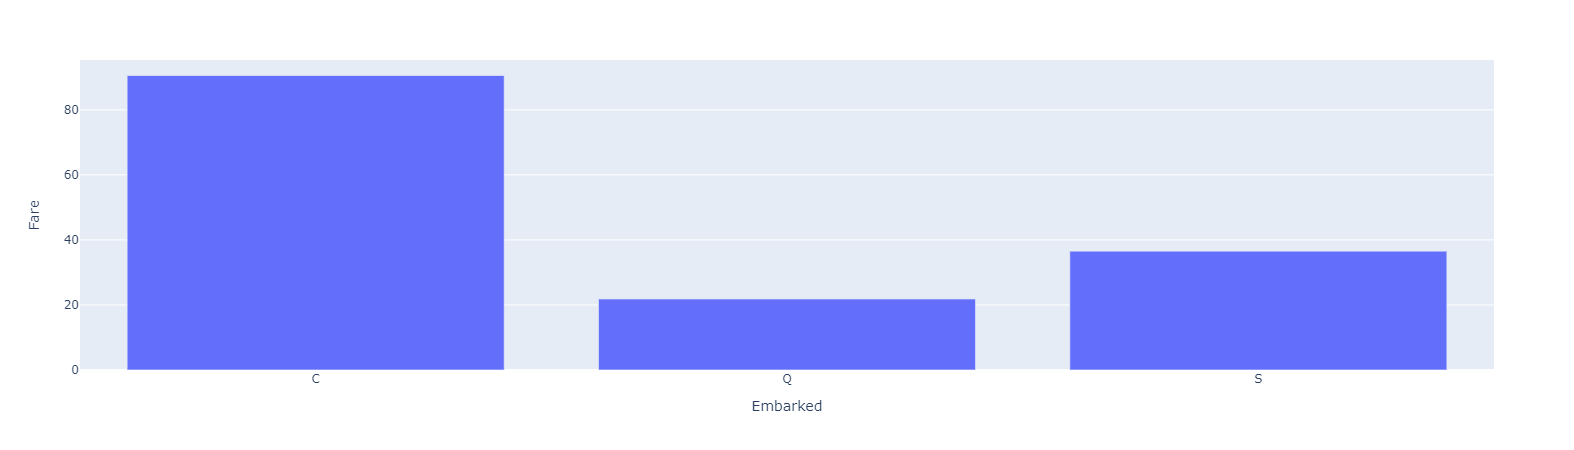

In [225]:
df_16 = df[['Embarked' , 'Fare']].groupby('Embarked').std()
px.bar(df_16 , x= df_16.index , y = 'Fare')

# Quiz 17
สร้าง barplot โดยให้ แกน X เป็นชั้นที่นั่ง และแกน Y เป็น Mean ของอายุ

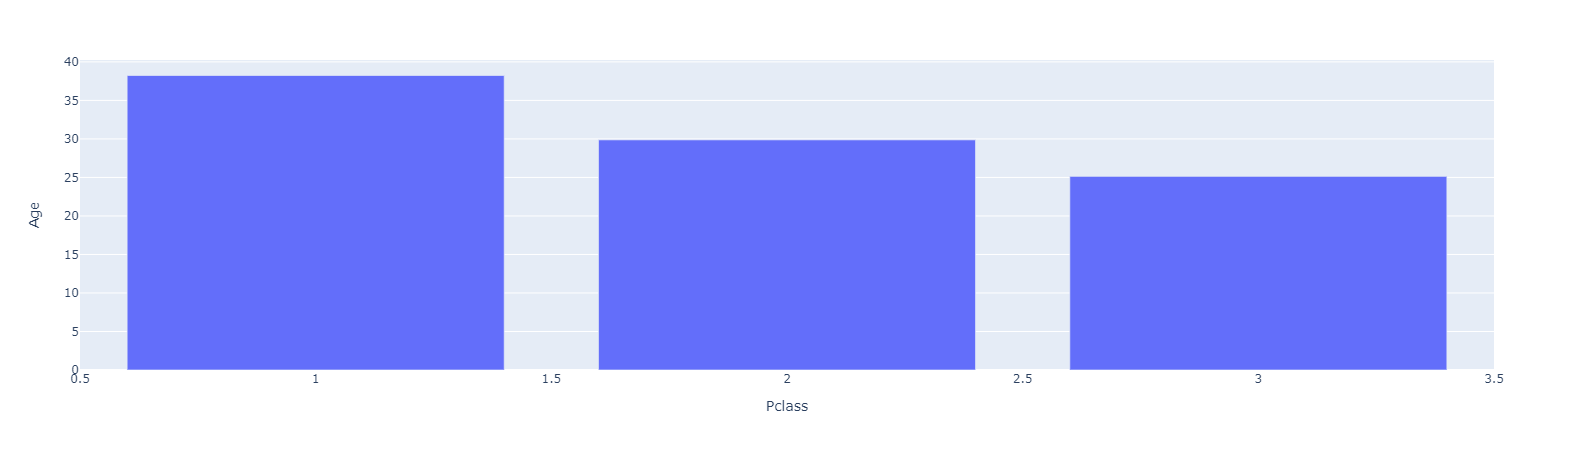

In [228]:
df_17 = df[['Pclass' , 'Age']].groupby('Pclass').mean()
px.bar(df_17 , x= df_17.index , y = 'Age')

# Quiz 18
สร้าง HeatMap โดย pivot table กำหนดให้ index เป็น Pclass และ column เป็นเพศ และ values เป็น ราคาเฉลี่ย

In [233]:
df_18 = df.pivot_table(index='Pclass' , columns='Sex' , values='Fare')
df_18

Sex,female,male
Pclass,,
1,107.946275,71.142781
2,21.951070,21.113131
3,15.875369,12.162695


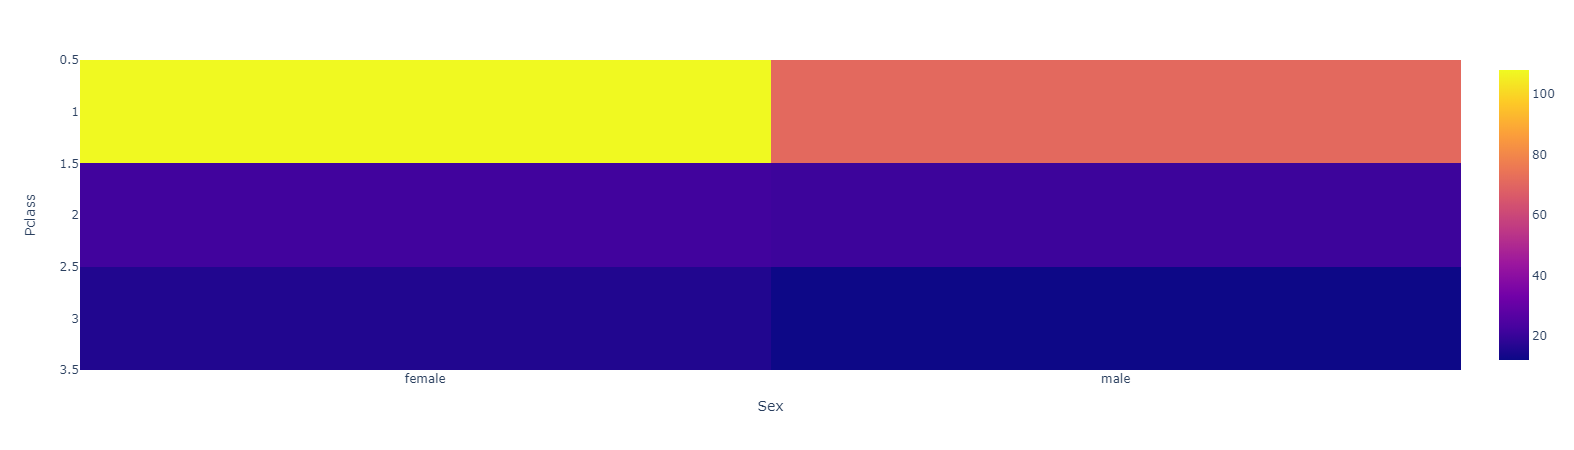

In [235]:
px.imshow(df_18)

# Quiz 19
สร้าง Heatmap โดย Correlation ของทั้ง DataFrame และเปลี่ยนสี

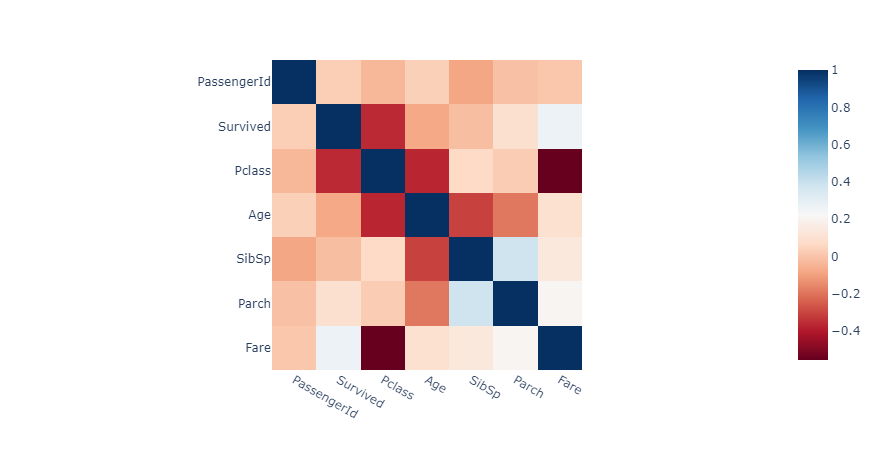

In [240]:
corr = df.corr()
px.imshow(corr , color_continuous_scale=px.colors.sequential.RdBu)

# Quiz 20
ใช้ไฟล์ 2011_us_ag_exports.csv สร้าง Choropleth ของอเมริกาโดยไล่สีตาม Cotton และเมื่อนำเม้าส์ไปวาง จะเห็นรายละเอียด total exports, total fruits, total veggies 

In [243]:
import plotly.graph_objects as go

In [242]:
df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df2

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95
5,CO,Colorado,state,1851.33,261.4,66.0,14.0,71.94,5.7,12.2,17.99,45.1,73.2,118.27,183.2,400.5,0.00
6,CT,Connecticut,state,259.62,1.1,0.1,6.9,9.49,4.2,8.9,13.10,4.3,6.9,11.16,0.0,0.0,0.00
7,DE,Delaware,state,282.19,0.4,0.6,114.7,2.30,0.5,1.0,1.53,7.6,12.4,20.03,26.9,22.9,0.00
8,FL,Florida,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24
9,GA,Georgia,state,2860.84,31.0,18.9,630.4,38.38,74.6,158.9,233.51,59.0,95.8,154.77,57.8,65.4,1154.07


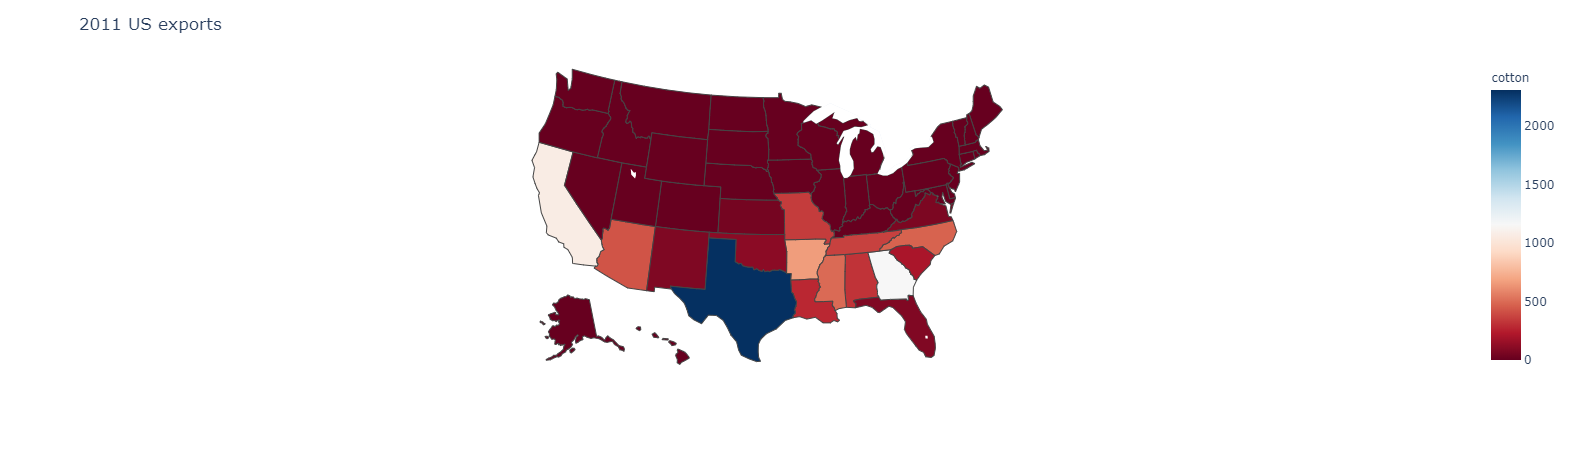

In [293]:
fig = px.choropleth(df2 ,
    locations = df2['code'] , 
    color = df2['cotton'] , 
    locationmode = 'USA-states' , 
    color_continuous_scale = px.colors.sequential.RdBu ,
    hover_data=['state' , 'total exports' , 'total fruits' , 'total veggies'])

fig.update_layout(title_text = '2011 US exports' , 
                 geo_scope = 'usa')

fig.show()

# Quiz 21
ใช้ไฟล์ 2011_us_ag_exports.csv สร้าง Choropleth ของอเมริกาโดยไล่สีตาม Total veggies และเมื่อนำเม้าส์ไปวาง จะเห็นรายละเอียด อัตราส่วน beef ต่อ pork เป็นเลขทศนิยม 2 ตำแหน่ง

In [289]:
df2['Ratio Beef:Pork'] = (df2['beef'] / df2['pork']).round(2)
df2.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,Ratio Beef:Pork
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,3.25
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,2.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,3.98
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,1.81
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,20.60


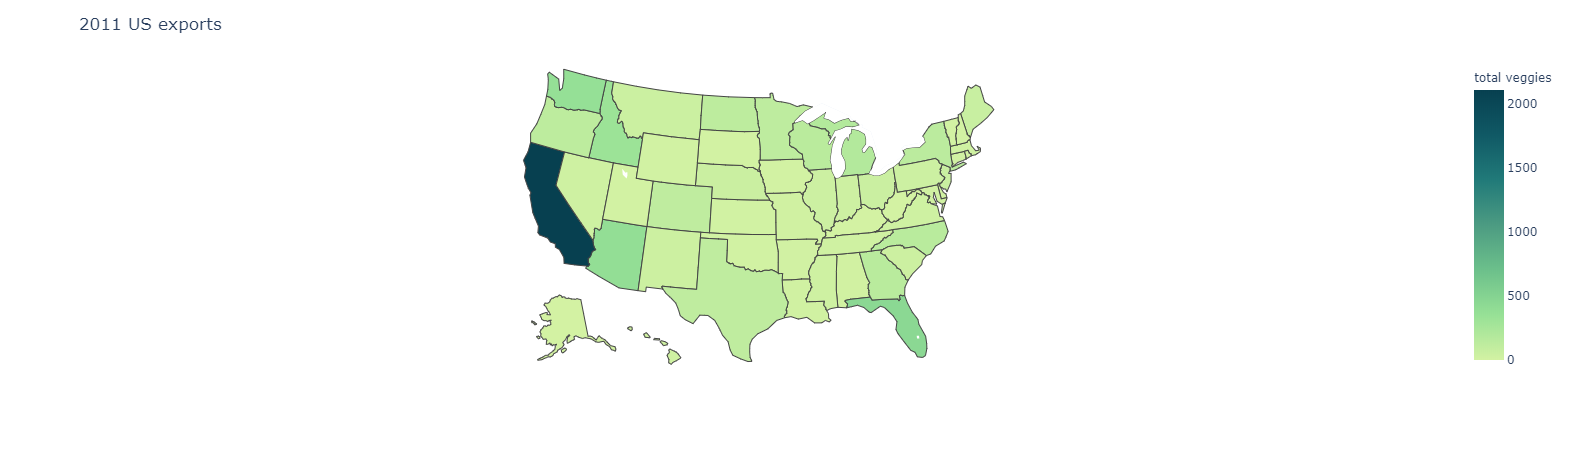

In [294]:
fig = px.choropleth(df2 ,
    locations = df2['code'] , 
    color = df2['total veggies'] , 
    locationmode = 'USA-states' , 
    color_continuous_scale = px.colors.sequential.Emrld ,
    hover_data=['state','Ratio Beef:Pork'])

fig.update_layout(title_text = '2011 US exports' , 
                 geo_scope = 'usa')

fig.show()

# Quiz 22
สุ่ม 10 States จากไฟล์ข้างต้น นำมาสร้าง Bar plot โดยแกน Y เป็น Total Exports และไล่สีตามอัตราส่วน cotton ต่อ Wheat พร้อมทั้งเปลี่ยนชื่อแกน และตั้งชื่อกราฟ (ถ้าอัตราส่วนหาค่าไม่ได้ให้ใช้ 0) 

In [374]:
df22 = df2.sample(random_state=5)
for i in range(57,66):
    df22 = df22.append(df2.sample(random_state=i))

df22

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,Ratio Beef:Pork
42,TX,Texas,state,6648.22,961.0,42.7,339.2,240.55,31.9,68.0,99.90,43.9,71.3,115.23,167.2,309.7,2308.76,22.51
29,NJ,New Jersey,state,500.40,0.8,0.4,4.6,3.37,35.0,74.5,109.45,21.6,35.0,56.54,10.1,6.7,0.00,2.00
48,WI,Wisconsin,state,3090.23,107.3,38.6,34.5,633.60,42.8,91.0,133.80,56.8,92.2,148.99,460.5,96.7,0.00,2.78
32,NC,North Carolina,state,3806.05,24.8,702.8,598.4,24.90,23.8,50.7,74.47,57.4,93.1,150.45,92.2,200.3,470.86,0.04
38,RI,Rhode Island,state,31.59,0.1,0.1,0.2,0.52,0.9,1.9,2.83,1.2,1.9,3.02,0.0,0.0,0.00,1.00
7,DE,Delaware,state,282.19,0.4,0.6,114.7,2.30,0.5,1.0,1.53,7.6,12.4,20.03,26.9,22.9,0.00,0.67
39,SC,South Carolina,state,929.93,15.2,10.9,186.5,7.62,17.1,36.4,53.45,16.3,26.4,42.66,32.1,55.3,206.10,1.39
8,FL,Florida,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24,47.33
9,GA,Georgia,state,2860.84,31.0,18.9,630.4,38.38,74.6,158.9,233.51,59.0,95.8,154.77,57.8,65.4,1154.07,1.64
41,TN,Tennessee,state,1535.13,51.1,17.6,82.4,21.18,2.0,4.2,6.23,9.4,15.3,24.67,88.8,100.0,363.83,2.90


In [375]:
df22['Ratio Cotton:Wheat'] = df22['cotton'] / df22['wheat']
df22

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,Ratio Beef:Pork,Ratio Cotton:Wheat
42,TX,Texas,state,6648.22,961.0,42.7,339.2,240.55,31.9,68.0,99.90,43.9,71.3,115.23,167.2,309.7,2308.76,22.51,7.454827
29,NJ,New Jersey,state,500.40,0.8,0.4,4.6,3.37,35.0,74.5,109.45,21.6,35.0,56.54,10.1,6.7,0.00,2.00,0.000000
48,WI,Wisconsin,state,3090.23,107.3,38.6,34.5,633.60,42.8,91.0,133.80,56.8,92.2,148.99,460.5,96.7,0.00,2.78,0.000000
32,NC,North Carolina,state,3806.05,24.8,702.8,598.4,24.90,23.8,50.7,74.47,57.4,93.1,150.45,92.2,200.3,470.86,0.04,2.350774
38,RI,Rhode Island,state,31.59,0.1,0.1,0.2,0.52,0.9,1.9,2.83,1.2,1.9,3.02,0.0,0.0,0.00,1.00,NaN
7,DE,Delaware,state,282.19,0.4,0.6,114.7,2.30,0.5,1.0,1.53,7.6,12.4,20.03,26.9,22.9,0.00,0.67,0.000000
39,SC,South Carolina,state,929.93,15.2,10.9,186.5,7.62,17.1,36.4,53.45,16.3,26.4,42.66,32.1,55.3,206.10,1.39,3.726944
8,FL,Florida,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24,47.33,43.466667
9,GA,Georgia,state,2860.84,31.0,18.9,630.4,38.38,74.6,158.9,233.51,59.0,95.8,154.77,57.8,65.4,1154.07,1.64,17.646330
41,TN,Tennessee,state,1535.13,51.1,17.6,82.4,21.18,2.0,4.2,6.23,9.4,15.3,24.67,88.8,100.0,363.83,2.90,3.638300


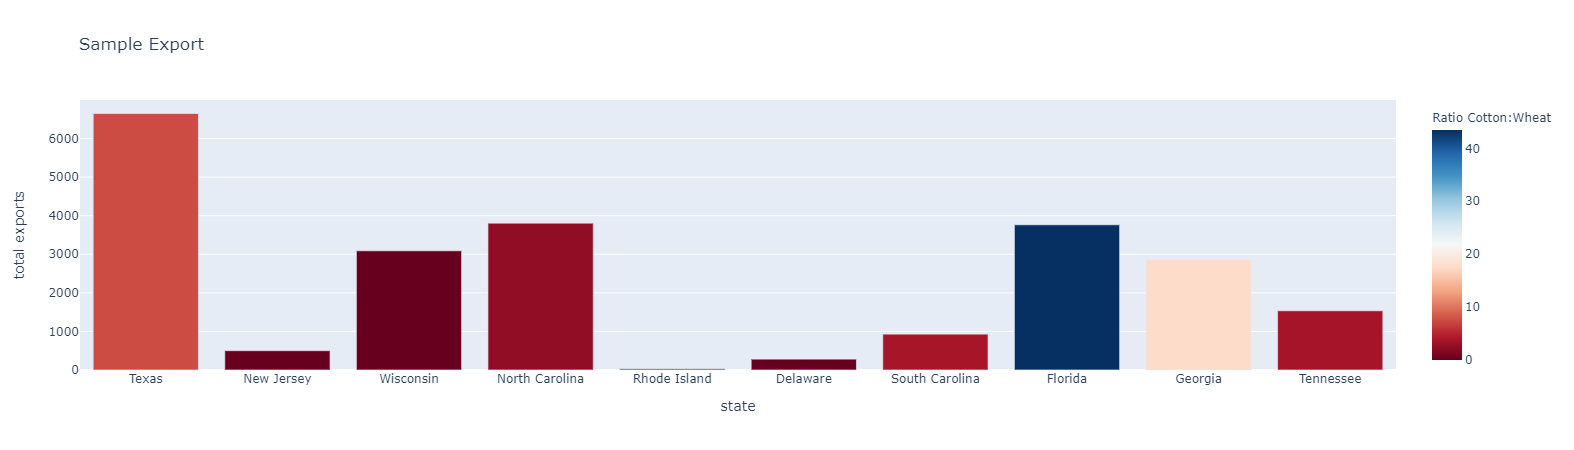

In [380]:
fig = px.bar(df22 , x='state' , y='total exports' , color='Ratio Cotton:Wheat' , title='Sample Export' ,color_continuous_scale=px.colors.sequential.RdBu)
fig.show()